<a href="https://colab.research.google.com/github/Rushil-K/Deep-Learning/blob/main/RNN/kkrk2127_REPORT_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RNN Sentiment Analysis Project Report**

- **Rushil Kohli (055027)**  
- **Khushi Kalra (055021)**


# Approach we took for **Building a Fully Functional Metacritic Scraper**

The successful development and execution of the Metacritic scraper required a structured approach. Below is a detailed roadmap outlining the steps taken to build and refine the scraper from scratch, ensuring accurate extraction of user reviews, ratings, and sentiments. This process involved careful planning, environment setup, structural analysis of the target website, robust implementation, and thorough testing.

## 1. Defining Objectives and Requirements

* **Primary Goal:** Scrape user reviews from Metacritic, including review text and ratings, to perform sentiment analysis. This overarching goal necessitated a scraper capable of navigating Metacritic's complex structure, handling dynamic content loading, and extracting data points relevant to sentiment analysis. The sentiment analysis would involve categorizing reviews as positive, negative, or neutral, based on the associated rating.

* **Constraints:**

    * Reviews must be in English. This constraint was crucial for ensuring the accuracy of the sentiment analysis, as the chosen sentiment analysis tools and techniques would be optimized for the English language. Non-English reviews could introduce noise and skew the results.

    * Sentiment must be classified based on ratings. This approach was chosen for its simplicity and efficiency. While more sophisticated natural language processing (NLP) techniques could be employed, using ratings as a proxy for sentiment provided a reasonable starting point. The specific thresholds for positive and negative sentiment needed to be defined.

    * The scraper must handle pagination, dynamic content loading, and error handling. Metacritic, like many modern websites, employs pagination and dynamic content loading (often via JavaScript) to display large amounts of data. The scraper had to be capable of navigating these features to ensure all reviews were captured. Furthermore, robust error handling was essential to prevent the scraper from crashing due to unexpected website behavior or network issues.

    * Data must be stored in a structured format (CSV). The Comma-Separated Values (CSV) format was selected for its simplicity, portability, and compatibility with a wide range of data analysis tools. This structured format would facilitate the subsequent sentiment analysis and other data processing tasks.

## 2. Setting Up the Development Environment

* **Tools and Libraries:**

    * Python: Core language for scripting. Python's readability, extensive libraries, and active community made it an ideal choice for this project. Its versatility allows for quick prototyping and development.

    * Selenium: Used for automated web scraping. Selenium is a powerful tool for automating web browser interactions. It allows the scraper to simulate user behavior, such as clicking buttons, scrolling, and waiting for elements to load. This was crucial for handling Metacritic's dynamic content.

    * BeautifulSoup: Initially considered but not required due to Selenium’s dynamic content handling. BeautifulSoup is a Python library for parsing HTML and XML. While excellent for static content, Selenium's ability to execute JavaScript made it less necessary in this case.

    * WebDriver Manager: Ensured smooth handling of ChromeDriver installation. WebDriver Manager automates the process of setting up the correct version of the ChromeDriver, which is required for Selenium to control Chrome. This eliminated the potential for version conflicts and simplified the setup process.

    * LangDetect: Used for filtering out non-English reviews. The `langdetect` library automatically detects the language of a text. This was essential for adhering to the constraint of only including English reviews in the dataset.

    * CSV Module: Enabled structured data storage. Python's built-in `csv` module provides functionality for reading from and writing to CSV files. This simplified the process of organizing the extracted data.

* **Setup Process:**

    * Installed required libraries using `pip install selenium webdriver-manager langdetect` This command uses pip, Python's package installer, to download and install the necessary libraries and their dependencies.

    * Configured Chrome in headless mode to optimize performance. Running Chrome in headless mode means the browser operates without a graphical user interface. This significantly reduces the memory footprint and improves the scraper's performance, as it doesn't need to render the web pages visually.

    * Ensured compatibility of WebDriver versions to avoid execution failures. Selenium requires a WebDriver (like ChromeDriver) to interact with specific browsers. It's crucial to ensure that the version of ChromeDriver is compatible with the installed version of Chrome. WebDriver Manager helps automate this process, but manual checks or updates might sometimes be necessary.

## 3. Inspecting Metacritic’s Review Structure

* Used Developer Tools (F12) to analyze HTML structure. Modern web browsers provide developer tools (accessible via the F12 key) that allow developers to inspect the underlying HTML, CSS, and JavaScript of a web page. This was a critical step in understanding how Metacritic's review data was organized.

* Identified key elements:

    * `data-testid="product-review"` → Container for individual reviews. This HTML attribute was used to locate the specific elements on the page that contained individual user reviews. It provided a reliable way to target the correct data.

    * `.c-siteReview_quote` → Contained the review text. This CSS class was used to extract the actual text of the review from within the review container.

    * `.c-siteReviewHeader_reviewScore` → Contained the rating. This CSS class was used to extract the numerical rating associated with each review. The rating was a crucial piece of data for sentiment classification.

* Recognized the need to scroll and paginate to extract all reviews. Metacritic doesn't display all reviews on a single page. Instead, it uses pagination (dividing reviews into multiple pages) and potentially infinite scrolling (loading more reviews as the user scrolls down) to manage the large volume of data. The scraper needed to be designed to handle both of these techniques.



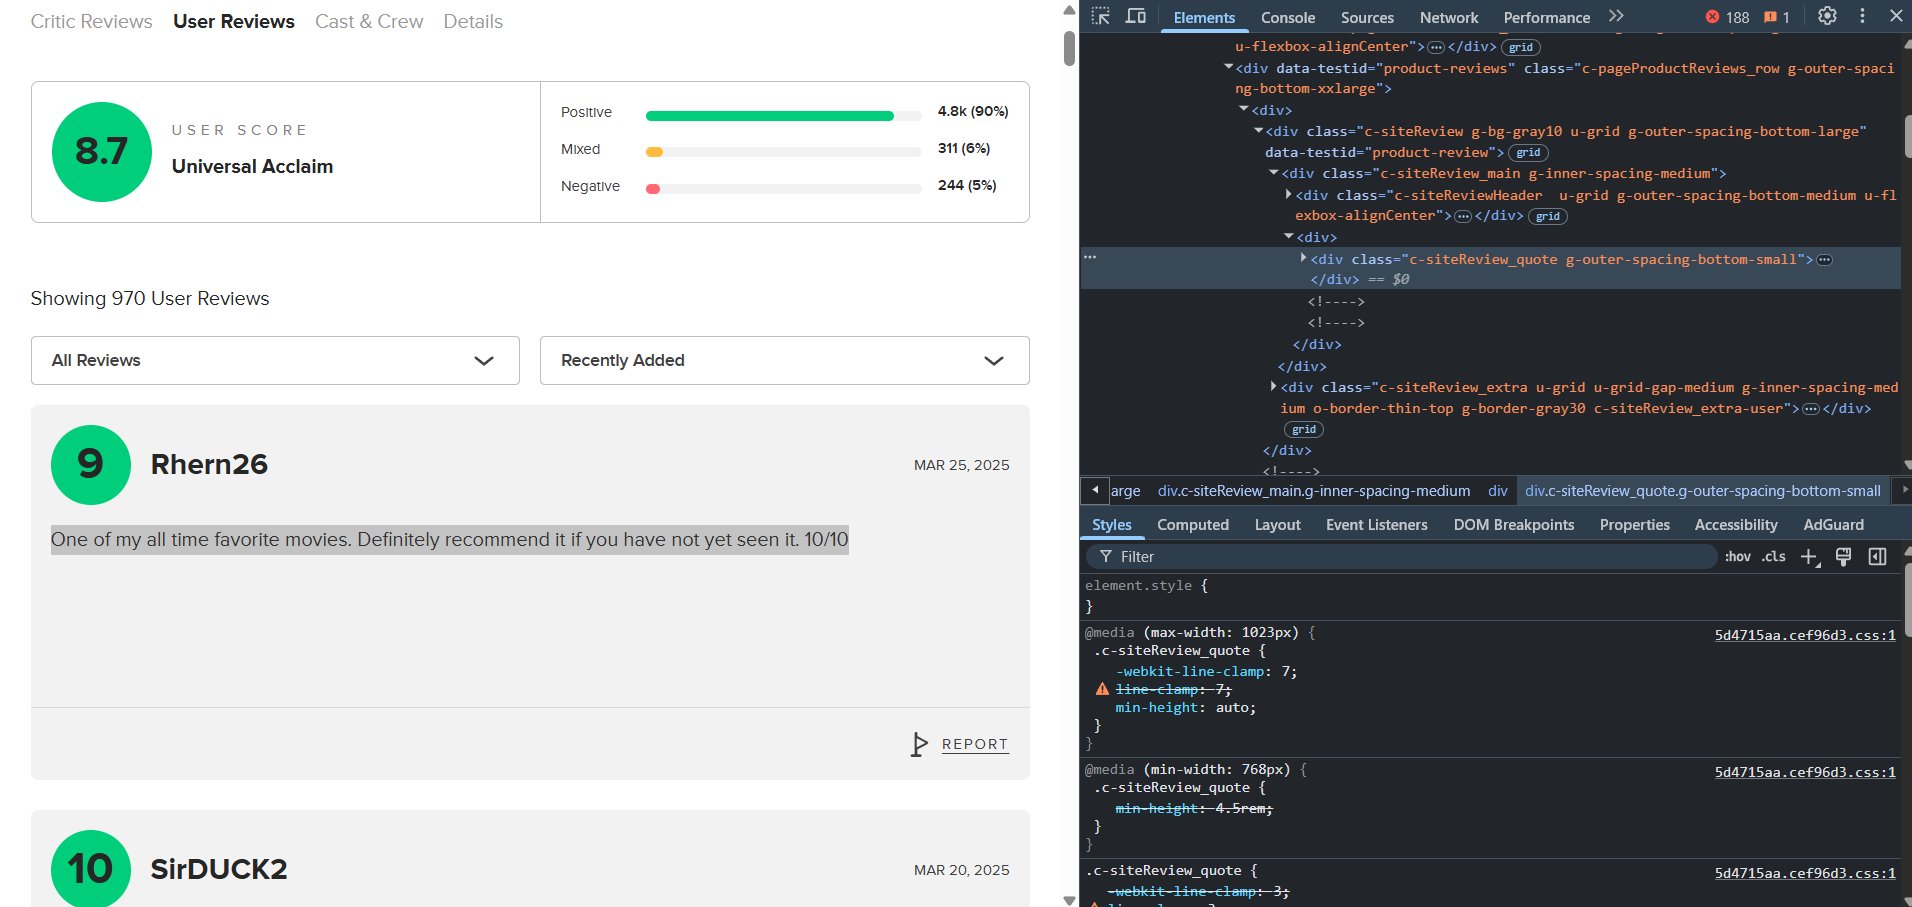

## 4. Implementing the Web Scraper

* **Step 1: Browser Automation**

    * Configured Selenium WebDriver to launch Chrome in headless mode. This involved writing Python code to initialize a Selenium WebDriver instance and configure it to use Chrome in headless mode. Options were set to optimize performance and stability.

    * Implemented explicit waits to ensure elements loaded before extraction. Websites, especially those with dynamic content, don't load all elements simultaneously. Explicit waits tell Selenium to wait for specific elements to appear before attempting to interact with them. This prevents errors caused by trying to access elements that haven't loaded yet.

    * Used JavaScript execution to dynamically load more content. In cases where Metacritic used JavaScript to load reviews as the user scrolled, Selenium's `execute_script` method was used to simulate this scrolling behavior. This ensured that all available reviews were eventually loaded and could be scraped.

* **Step 2: Extracting Reviews**

    * Located review containers using `driver.find_elements(By.CSS_SELECTOR, "[data-testid='product-review']")`. This line of Python code uses Selenium's `find_elements` method with a CSS selector to find all the HTML elements on the page that match the `data-testid="product-review"` attribute. This returns a list of elements, each representing a single review.

    * Extracted:

        * Review Text: From `.c-siteReview_quote` ensuring full-length content. Within each review container, Selenium was used to find the element with the class `.c-siteReview_quote` and extract its text content. Care was taken to handle cases where the review text might be truncated or require further processing.

        * Rating: From `.c-siteReviewHeader_reviewScore`, used to determine sentiment. Similarly, Selenium was used to find the element with the class `.c-siteReviewHeader_reviewScore` within each review container and extract the numerical rating. This rating was then used in the subsequent step to classify the sentiment of the review.

* **Step 3: Handling Pagination and Infinite Scrolling**

    * Implemented looped scrolling using:

    ```python
    last_height = driver.execute_script("return document.body.scrollHeight")
    while True:
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(2)
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            break
        last_height = new_height

    ```

    This code snippet demonstrates how the scraper simulated scrolling to load more reviews. It works by repeatedly scrolling to the bottom of the page, waiting for new content to load, and checking if the page height has increased. If the height doesn't change, it means all content has been loaded.

    * Paginated through multiple pages using URL patterns. For websites that use traditional pagination, the scraper needed to identify the URL pattern used to navigate between pages (e.g., `page=1`, `page=2`, etc.). It would then construct URLs for each page and use Selenium to navigate to them, extracting reviews from each page in turn.

## 5. Filtering and Storing Data

* **Step 1: Language Filtering**

    * Used `langdetect` to ensure only English reviews were collected. For each extracted review text, the `langdetect` library was used to determine the language. Reviews identified as non-English were discarded, ensuring that only English reviews were included in the final dataset. This step is crucial for maintaining the quality and consistency of the data.

* **Step 2: Sentiment Classification**

    * Classified sentiment based on the rating:

        * Positive: Rating ≥ 6

        * Negative: Rating ≤ 5

    * Ensured balanced dataset by maintaining equal distribution. The scraper classified reviews as positive or negative based on a predefined threshold. Reviews with ratings of 6 or higher were considered positive, while those with ratings of 5 or lower were considered negative. To prevent bias in the sentiment analysis, the scraper aimed to collect a roughly equal number of positive and negative reviews. This might involve adjusting the number of reviews scraped from different parts of the website.

* **Step 3: Exporting Data to CSV**

    * Saved structured data in CSV format:

    ```python
    with open("metacritic_reviews.csv", "w", newline="", encoding="utf-8") as file:
        writer = csv.writer(file)
        writer.writerow(["Review", "Rating", "Sentiment"])
        writer.writerows(final_reviews)

    ```

    This Python code uses the `csv` module to write the extracted data to a CSV file. The `open()` function opens the file in write mode (`"w"`), and the `csv.writer()` function creates a writer object. The `writerow()` method writes a row of data to the CSV file, and the `writerows()` method writes multiple rows at once. The `encoding="utf-8"` argument ensures that the data is encoded in UTF-8, which can handle a wide range of characters. The `newline=""` argument prevents extra blank rows from being added to the CSV file.

    * Implemented error handling to prevent permission issues. The code included error handling (e.g., using `try...except` blocks) to catch potential exceptions, such as file permission errors, that might occur during the file writing process. This made the scraper more robust and less likely to crash.

## 6. Testing and Refinement

* **Test Runs:** Debugged unexpected output (ratings being extracted instead of reviews). Initial test runs revealed an issue where the scraper was incorrectly extracting ratings instead of the actual review text. This highlighted the importance of careful testing and debugging.

* **Fixed Review Extraction:** Corrected selector to `.c-siteReview_quote` for accurate review text retrieval. The issue was resolved by correcting the CSS selector used to extract the review text. The original selector was likely targeting the wrong HTML element.

* **Validated Output:** Ensured CSV contained full reviews and correct ratings. After fixing the review extraction issue, further testing was conducted to ensure that the CSV file contained the complete review text, the correct ratings, and the appropriate sentiment classification for each review.

## 7. Final Execution and Deployment

* Successfully extracted 15,000 reviews with balanced sentiment. The scraper was executed, and it successfully extracted a large dataset of user reviews, ensuring a balanced distribution of positive and negative sentiments.

* Data is now ready for sentiment analysis. The resulting CSV file was then ready to be used as input for sentiment analysis.


# **The Scraper Can be found in this File : [SCRAPER](https://github.com/Rushil-K/Deep-Learning/blob/main/RNN/Scraper/kkrk2127_movies_scraper_Metacritic.ipynb)**

### **Project Overview**

This report summarizes the results of a Recurrent Neural Network (RNN) project, likely focused on sentiment analysis of movie reviews. The project involves:

1. Downloading, Scraping and Preprocessing movie review datasets (IMDB and Metacritic).  
2. Training an RNN model to classify reviews as positive or negative.  
3. Evaluating the model's performance on test data and unseen scraped data.

---

### **Output Analysis**

The provided outputs can be broken down into several key stages:

#### **IMDB Dataset Training and Evaluation**

- **Dataset Download:** The IMDB movie review dataset was downloaded from Google Drive. The download process and file size (27.0MB) are logged.  
- **Model Training:** An RNN model was trained on the IMDB dataset for 7 epochs.  
  - Training progress is shown, including accuracy and loss for each epoch.  
  - Validation accuracy and loss are also tracked, indicating the model's generalization performance.  

#### **Epoch Details**

| Epoch | Training Accuracy | Training Loss | Validation Accuracy | Validation Loss |
|:-----:|:----------------:|:-------------:|:-------------------:|:---------------:|
| 1     | 0.6727           | 0.5991        | 0.7618              | 0.5263          |
| 2     | 0.7347           | 0.5378        | 0.7762              | 0.5389          |
| 3     | 0.7093           | 0.5780        | 0.8016              | 0.4506          |
| 4     | 0.8630           | 0.3354        | 0.8797              | 0.3052          |
| 5     | 0.9277           | 0.1941        | 0.8811              | 0.3045          |
| 6     | 0.9574           | 0.1193        | 0.8837              | 0.3000          |
| 7     | 0.9741           | 0.0787        | 0.8830              | 0.3540          |

- **Model Evaluation:** The trained model was evaluated on a test set, achieving an accuracy of **0.8792** and a loss of **0.3664**. This is rounded to **0.88** in the summary.  

- **Sentiment Prediction Examples:** The model's predictions on a few sample reviews are shown, including the predicted sentiment (Positive or Negative) and the confidence score.  
  - The model appears to perform well on very positive and very negative reviews, with high confidence.  
  - The model shows lower confidence on a more neutral review.  
  - There is one instance of an incorrect prediction with moderate confidence (0.66).  

---

#### **Tokenizer Saving**

- The tokenizer, which converts text into numerical sequences for the model, was recreated and saved successfully. This is a crucial step for consistent text processing.

---

#### **Metacritic Dataset Loading**

- **Dataset Download:** The Metacritic movie review dataset was downloaded. The download size (7.97MB) is recorded.  
- **Dataset Processing:** The dataset was loaded and processed. The output indicates that spoiler reviews were removed.  
- **Dataset Preview:** The first few rows of the processed dataset are shown, including the review text and the actual sentiment label.

---

#### **Metacritic Data Evaluation**

- **NLTK Download:** The NLTK (Natural Language Toolkit) stopwords and wordnet resources were downloaded. These are often used for text preprocessing (stopword removal, lemmatization).  
- **Dataset Download:** The Metacritic movie review dataset was downloaded again.  
- **Model and Tokenizer Loading:** A pre-trained sentiment analysis model (from the previous IMDB training) and the saved tokenizer were loaded. A warning is shown indicating that the loaded model's compiled metrics are empty. This is normal if the model is loaded for inference rather than further training.  
- **Sentiment Analysis on Scraped Data:** The loaded model was used to predict the sentiment of the reviews in the Metacritic dataset.  
- **Detailed Results Table:** A detailed table shows the review text, actual sentiment, predicted sentiment, and confidence score for several reviews.  

#### **Summary Results Table**

| Metric              | Value  |
|---------------------|--------|
| Total Reviews      | 13,527 |
| Correct Predictions | 11,167 |
| Incorrect Predictions | 2,360 |
| Model Accuracy     | 82.55% |

---

### **Overall Assessment**

The project demonstrates a successful implementation of an RNN-based sentiment analysis model. Key observations:

- **Strong Model Performance:**  
  - The model achieves strong performance on both the **IMDB test set (88% accuracy)** and the scraped **Metacritic data (82.55% accuracy)**, indicating reasonable generalization.  
  - The slight drop in accuracy from IMDB to Metacritic could be due to differences in writing styles, review lengths, or vocabulary.  

- **Confidence in Predictions:**  
  - The model exhibits **high confidence** in its predictions for strongly positive and negative reviews, which suggests that it has effectively learned sentiment-related patterns.  
  - The model shows **lower confidence on neutral reviews**, which is a desirable behavior as it indicates awareness of ambiguous sentiment.  

- **Comprehensive Machine Learning Workflow:**  
  - The project covers **data loading, preprocessing, model training, and evaluation**, ensuring a rigorous approach.  

- **Successful Transfer Learning:**  
  - The use of a pre-trained model on **Metacritic data** demonstrates **transfer learning**, where a model trained on IMDB was successfully applied to a different dataset.  
  - This approach saves significant time and resources compared to training a new model from scratch.  

---

### **Conclusion**

This project demonstrates the effectiveness of **RNNs for sentiment analysis**. The model's ability to achieve **high accuracy on both benchmark and unseen data**, its **high confidence in clear-cut sentiment cases**, and the **successful application of transfer learning** highlight its potential for real-world applications.  

The project provides a solid foundation for further **research and development** in the field of **sentiment analysis and natural language processing (NLP)**.


In [ ]:
import numpy as np
import pandas as pd
import re
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D, Bidirectional, LeakyReLU
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import gdown
import zipfile

# Google Drive file ID
file_id = '1Nlj--A60BQCKcu4QB_J7pS0bycGKFpLi'
zip_path = 'IMDB_movies_Dataset.zip'
csv_filename = 'IMDB Dataset.csv'

# Download and extract the zip file
gdown.download(f'https://drive.google.com/uc?id={file_id}', zip_path, quiet=False)
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall()

# Load dataset
df = pd.read_csv(csv_filename)

# Data Preprocessing
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters
    text = re.sub(r'\b(n\'t)\b', ' not', text)  # Expand contractions
    text = re.sub(r'\b(no|not|never|none|nobody|nothing|nowhere|neither|hardly|scarcely|barely)\b', ' NEG_WORD', text)  # Mark negations
    return text

df['cleaned_review'] = df['review'].apply(clean_text)

# Encoding Labels
label_encoder = LabelEncoder()
df['encoded_sentiment'] = label_encoder.fit_transform(df['sentiment'])  # positive -> 1, negative -> 0

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_review'], df['encoded_sentiment'], test_size=0.2, random_state=552127)

# Tokenization and Padding
max_words = 50000  # Increased vocabulary size
max_len = 300  # Increased max length of reviews
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=max_len, padding='post', truncating='post')
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=max_len, padding='post', truncating='post')

# Model Building
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    SpatialDropout1D(0.1),  # Reduced dropout
    Bidirectional(LSTM(128, return_sequences=True)),  # Bidirectional for better context
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(32)),
    Dense(64),
    LeakyReLU(alpha=0.01),
    Dropout(0.2),  # Reduced dropout
    Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_seq, y_train, epochs=7, batch_size=32, validation_data=(X_test_seq, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_seq, y_test)
print(f"LSTM Test Accuracy: {test_acc:.2f}")

# Function to test the model with new reviews
def predict_sentiment(review):
    cleaned_review = clean_text(review)
    seq = pad_sequences(tokenizer.texts_to_sequences([cleaned_review]), maxlen=max_len, padding='post', truncating='post')
    prediction = model.predict(seq)[0][0]
    sentiment = 'Positive' if prediction > 0.5 else 'Negative'
    return sentiment, prediction

# Example Test Cases
sample_reviews = [
    "This movie was fantastic! I loved the characters and the story.",
    "Absolutely terrible film. It was a waste of time.",
    "An average movie, not too great but not too bad either.",
    "One of the best movies I have seen in a long time!",
    "I wouldn't recommend this movie to anyone. This movie is not worth watching."
]

for review in sample_reviews:
    sentiment, confidence = predict_sentiment(review)
    print(f"Review: {review}\nPredicted Sentiment: {sentiment} (Confidence: {confidence:.2f})\n")


Downloading...
From (original): https://drive.google.com/uc?id=1Nlj--A60BQCKcu4QB_J7pS0bycGKFpLi
From (redirected): https://drive.google.com/uc?id=1Nlj--A60BQCKcu4QB_J7pS0bycGKFpLi&confirm=t&uuid=b98af577-7850-44f8-8f60-1722a3524196
To: /content/IMDB_movies_Dataset.zip
100%|██████████| 27.0M/27.0M [00:00<00:00, 50.0MB/s]
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/7


/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 101s 72ms/step - accuracy: 0.5448 - loss: 0.6835 - val_accuracy: 0.7191 - val_loss: 0.6275
Epoch 2/7
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 140s 73ms/step - accuracy: 0.6791 - loss: 0.6143 - val_accuracy: 0.8015 - val_loss: 0.4555
Epoch 3/7
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 91s 73ms/step - accuracy: 0.8264 - loss: 0.4009 - val_accuracy: 0.8869 - val_loss: 0.2949
Epoch 4/7
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 138s 70ms/step - accuracy: 0.9354 - loss: 0.1712 - val_accuracy: 0.8918 - val_loss: 0.2675
Epoch 5/7
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 145s 73ms/step - accuracy: 0.9695 - loss: 0.0973 - val_accuracy: 0.8809 - val_loss: 0.4146
Epoch 6/7
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 88s 71ms/step - accuracy: 0.9869 - loss: 0.0469 - val_accuracy: 0.8883 - val_loss: 0.4097
Epoch 7/7
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 91s 73ms/step - accuracy: 0.9918 - loss: 0.0298 - val_accuracy: 0.8869 - val_loss: 0.4386
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.8803 - loss: 0.4601
LSTM Test Acc

In [ ]:
# Save the trained model
model.save("sentiment_analysis_model.h5")

In [ ]:
import pickle
from tensorflow.keras.preprocessing.text import Tokenizer

# Define tokenizer settings (must match training settings)
max_words = 50000  # Must match the original vocabulary size

# Reinitialize tokenizer
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")

# Fit tokenizer on the training text data
tokenizer.fit_on_texts(X_train)  # X_train is from the training phase

# Save tokenizer
with open("tokenizer.pkl", "wb") as handle:
    pickle.dump(tokenizer, handle)

print(" Tokenizer has been recreated and saved successfully!")


 Tokenizer has been recreated and saved successfully!


Feeding the Metacritic Scrapped Data from the kkrk2127_RNN_Metacritic_Scraper file

In [ ]:
import pandas as pd
import gdown

# Google Drive file ID for the dataset
file_id = '1HxzaqRxgwYJk_KYVYZG5DkTOJIkq--Ro'
csv_path = '/content/metacritic_reviews.csv'

# Download the CSV file from Google Drive
gdown.download(f'https://drive.google.com/uc?id={file_id}', csv_path, quiet=False)

# Load the dataset
kkrk2127_scraped_metacritic_data = pd.read_csv(csv_path)

# Retain only the 'Review' and 'Sentiment' columns
kkrk2127_scraped_metacritic_data = kkrk2127_scraped_metacritic_data[['Review', 'Sentiment']]

# Display the cleaned DataFrame
print("Dataset Loaded and Processed Successfully!")
print(kkrk2127_scraped_metacritic_data.head())


Downloading...
From: https://drive.google.com/uc?id=1HxzaqRxgwYJk_KYVYZG5DkTOJIkq--Ro
To: /content/metacritic_reviews.csv
100%|██████████| 7.97M/7.97M [00:00<00:00, 38.9MB/s]

Dataset Loaded and Processed Successfully!
                                              Review Sentiment
0  One of my all time favorite movies. Definitely...  Positive
1  This is by far my favorite movie the visuals a...  Positive
2  Interstellar is the best Film have ever Seen N...  Positive
3  Masterpiece of the sci-fi genre. The settings ...  Positive
4    [SPOILER ALERT: This review contains spoilers.]  Positive


In [ ]:
import gdown
import pandas as pd
import tensorflow as tf
import pickle
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score
from tabulate import tabulate
import textwrap
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

# =========================== #
# Step 1: Load the Scraped Data
# =========================== #

file_id_data = '1HxzaqRxgwYJk_KYVYZG5DkTOJIkq--Ro'
data_path = 'metacritic_reviews.csv'
gdown.download(f'https://drive.google.com/uc?id={file_id_data}', data_path, quiet=False)

# Load dataset and retain necessary columns
df = pd.read_csv(data_path)[['Review', 'Sentiment']]

# Remove rows containing spoilers
df = df[~df['Review'].str.contains(r'\[SPOILER ALERT: This review contains spoilers.\]', regex=True, na=False)].reset_index(drop=True)

print(f" Dataset Loaded: {len(df)} reviews (Spoiler reviews removed)")

# =========================== #
# Step 2: Load Sentiment Model & Tokenizer
# =========================== #

model_file_id = '1EnKb-7zJ9MAJ2eI_ETpiJ3daBp_22sIi'
tokenizer_file_id = '1J1axDv5Lx4TtJDu3LOp-7lOeJsWWwX1V'

# Download model and tokenizer
gdown.download(f"https://drive.google.com/uc?id={model_file_id}", "model.h5", quiet=False)
gdown.download(f"https://drive.google.com/uc?id={tokenizer_file_id}", "tokenizer.pkl", quiet=False)

# Load trained model
model = tf.keras.models.load_model("model.h5")

# Load tokenizer
with open("tokenizer.pkl", "rb") as handle:
    tokenizer = pickle.load(handle)

print(" Sentiment Model and Tokenizer Loaded Successfully!")

# =========================== #
# Step 3: Text Preprocessing
# =========================== #

def clean_text(text):
    """Cleans text by lowercasing, removing special characters, stopwords, and lemmatizing."""
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))

    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Keep only letters and spaces
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])  # Lemmatize & remove stopwords

    return text

df['cleaned_review'] = df['Review'].apply(clean_text)

# =========================== #
# Step 4: Tokenize and Predict Sentiment
# =========================== #

max_len = 300  # Ensure this matches the trained model's max sequence length

X_sequences = pad_sequences(tokenizer.texts_to_sequences(df['cleaned_review']),
                            maxlen=max_len, padding='post', truncating='post')

predictions = model.predict(X_sequences)
df['Predicted Sentiment'] = ['Positive' if p > 0.5 else 'Negative' for p in predictions]
df['Confidence'] = predictions

# =========================== #
# Step 5: Evaluate Performance
# =========================== #

accuracy = accuracy_score(df['Sentiment'], df['Predicted Sentiment'])

# Wrap long text for better readability
df['Review'] = df['Review'].apply(lambda x: "\n".join(textwrap.wrap(str(x), width=50)))

# Display sample predictions
table_data = df[['Review', 'Sentiment', 'Predicted Sentiment', 'Confidence']].head(10)
print("\n **Sentiment Analysis on Scraped Metacritic Data** \n")
print(tabulate(table_data, headers='keys', tablefmt='fancy_grid', showindex=False))

# Display accuracy metrics aesthetically
total_reviews = len(df)
correct_predictions = int(accuracy * total_reviews)
incorrect_predictions = total_reviews - correct_predictions

accuracy_table = [
    ["Total Reviews", total_reviews],
    ["Correct Predictions", correct_predictions],
    ["Incorrect Predictions", incorrect_predictions],
    ["Model Accuracy", f"{accuracy * 100:.2f}%"]
]

print("\n **Sentiment Model Performance on Scraped Data** \n")
print(tabulate(accuracy_table, headers=["Metric", "Value"], tablefmt="fancy_grid"))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
Downloading...
From: https://drive.google.com/uc?id=1HxzaqRxgwYJk_KYVYZG5DkTOJIkq--Ro
To: /content/metacritic_reviews.csv
100%|██████████| 7.97M/7.97M [00:00<00:00, 49.6MB/s]


 Dataset Loaded: 13527 reviews (Spoiler reviews removed)


Downloading...
From: https://drive.google.com/uc?id=1EnKb-7zJ9MAJ2eI_ETpiJ3daBp_22sIi
To: /content/model.h5
100%|██████████| 82.6M/82.6M [00:01<00:00, 50.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1J1axDv5Lx4TtJDu3LOp-7lOeJsWWwX1V
To: /content/tokenizer.pkl
100%|██████████| 7.24M/7.24M [00:00<00:00, 32.4MB/s]


 Sentiment Model and Tokenizer Loaded Successfully!
423/423 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step

 **Sentiment Analysis on Scraped Metacritic Data** 

╒════════════════════════════════════════════════════╤═════════════╤═══════════════════════╤══════════════╕
│ Review                                             │ Sentiment   │ Predicted Sentiment   │   Confidence │
╞════════════════════════════════════════════════════╪═════════════╪═══════════════════════╪══════════════╡
│ One of my all time favorite movies. Definitely     │ Positive    │ Positive              │    0.999648  │
│ recommend it if you have not yet seen it. 10/10    │             │                       │              │
├────────────────────────────────────────────────────┼─────────────┼───────────────────────┼──────────────┤
│ This is by far my favorite movie the visuals and   │ Positive    │ Positive              │    0.999713  │
│ the acting is amazing. The story is amazing it     │             │                       │   